In [193]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [194]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None


In [195]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [196]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [197]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [198]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [199]:

from datetime import datetime

from dateutil.parser import parse
from time import time
import os
import re
import sys
import timeit
import string

In [200]:
df.shape

(1470, 35)

In [201]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [202]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [203]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [204]:
#data is containing so many columns providing infomation on personal and employment

In [205]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [207]:
#here no missing values in data 

In [208]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [209]:
#here mean , standard deviation all we can kmow

In [210]:
#now will just plot histogram plots and see distributions

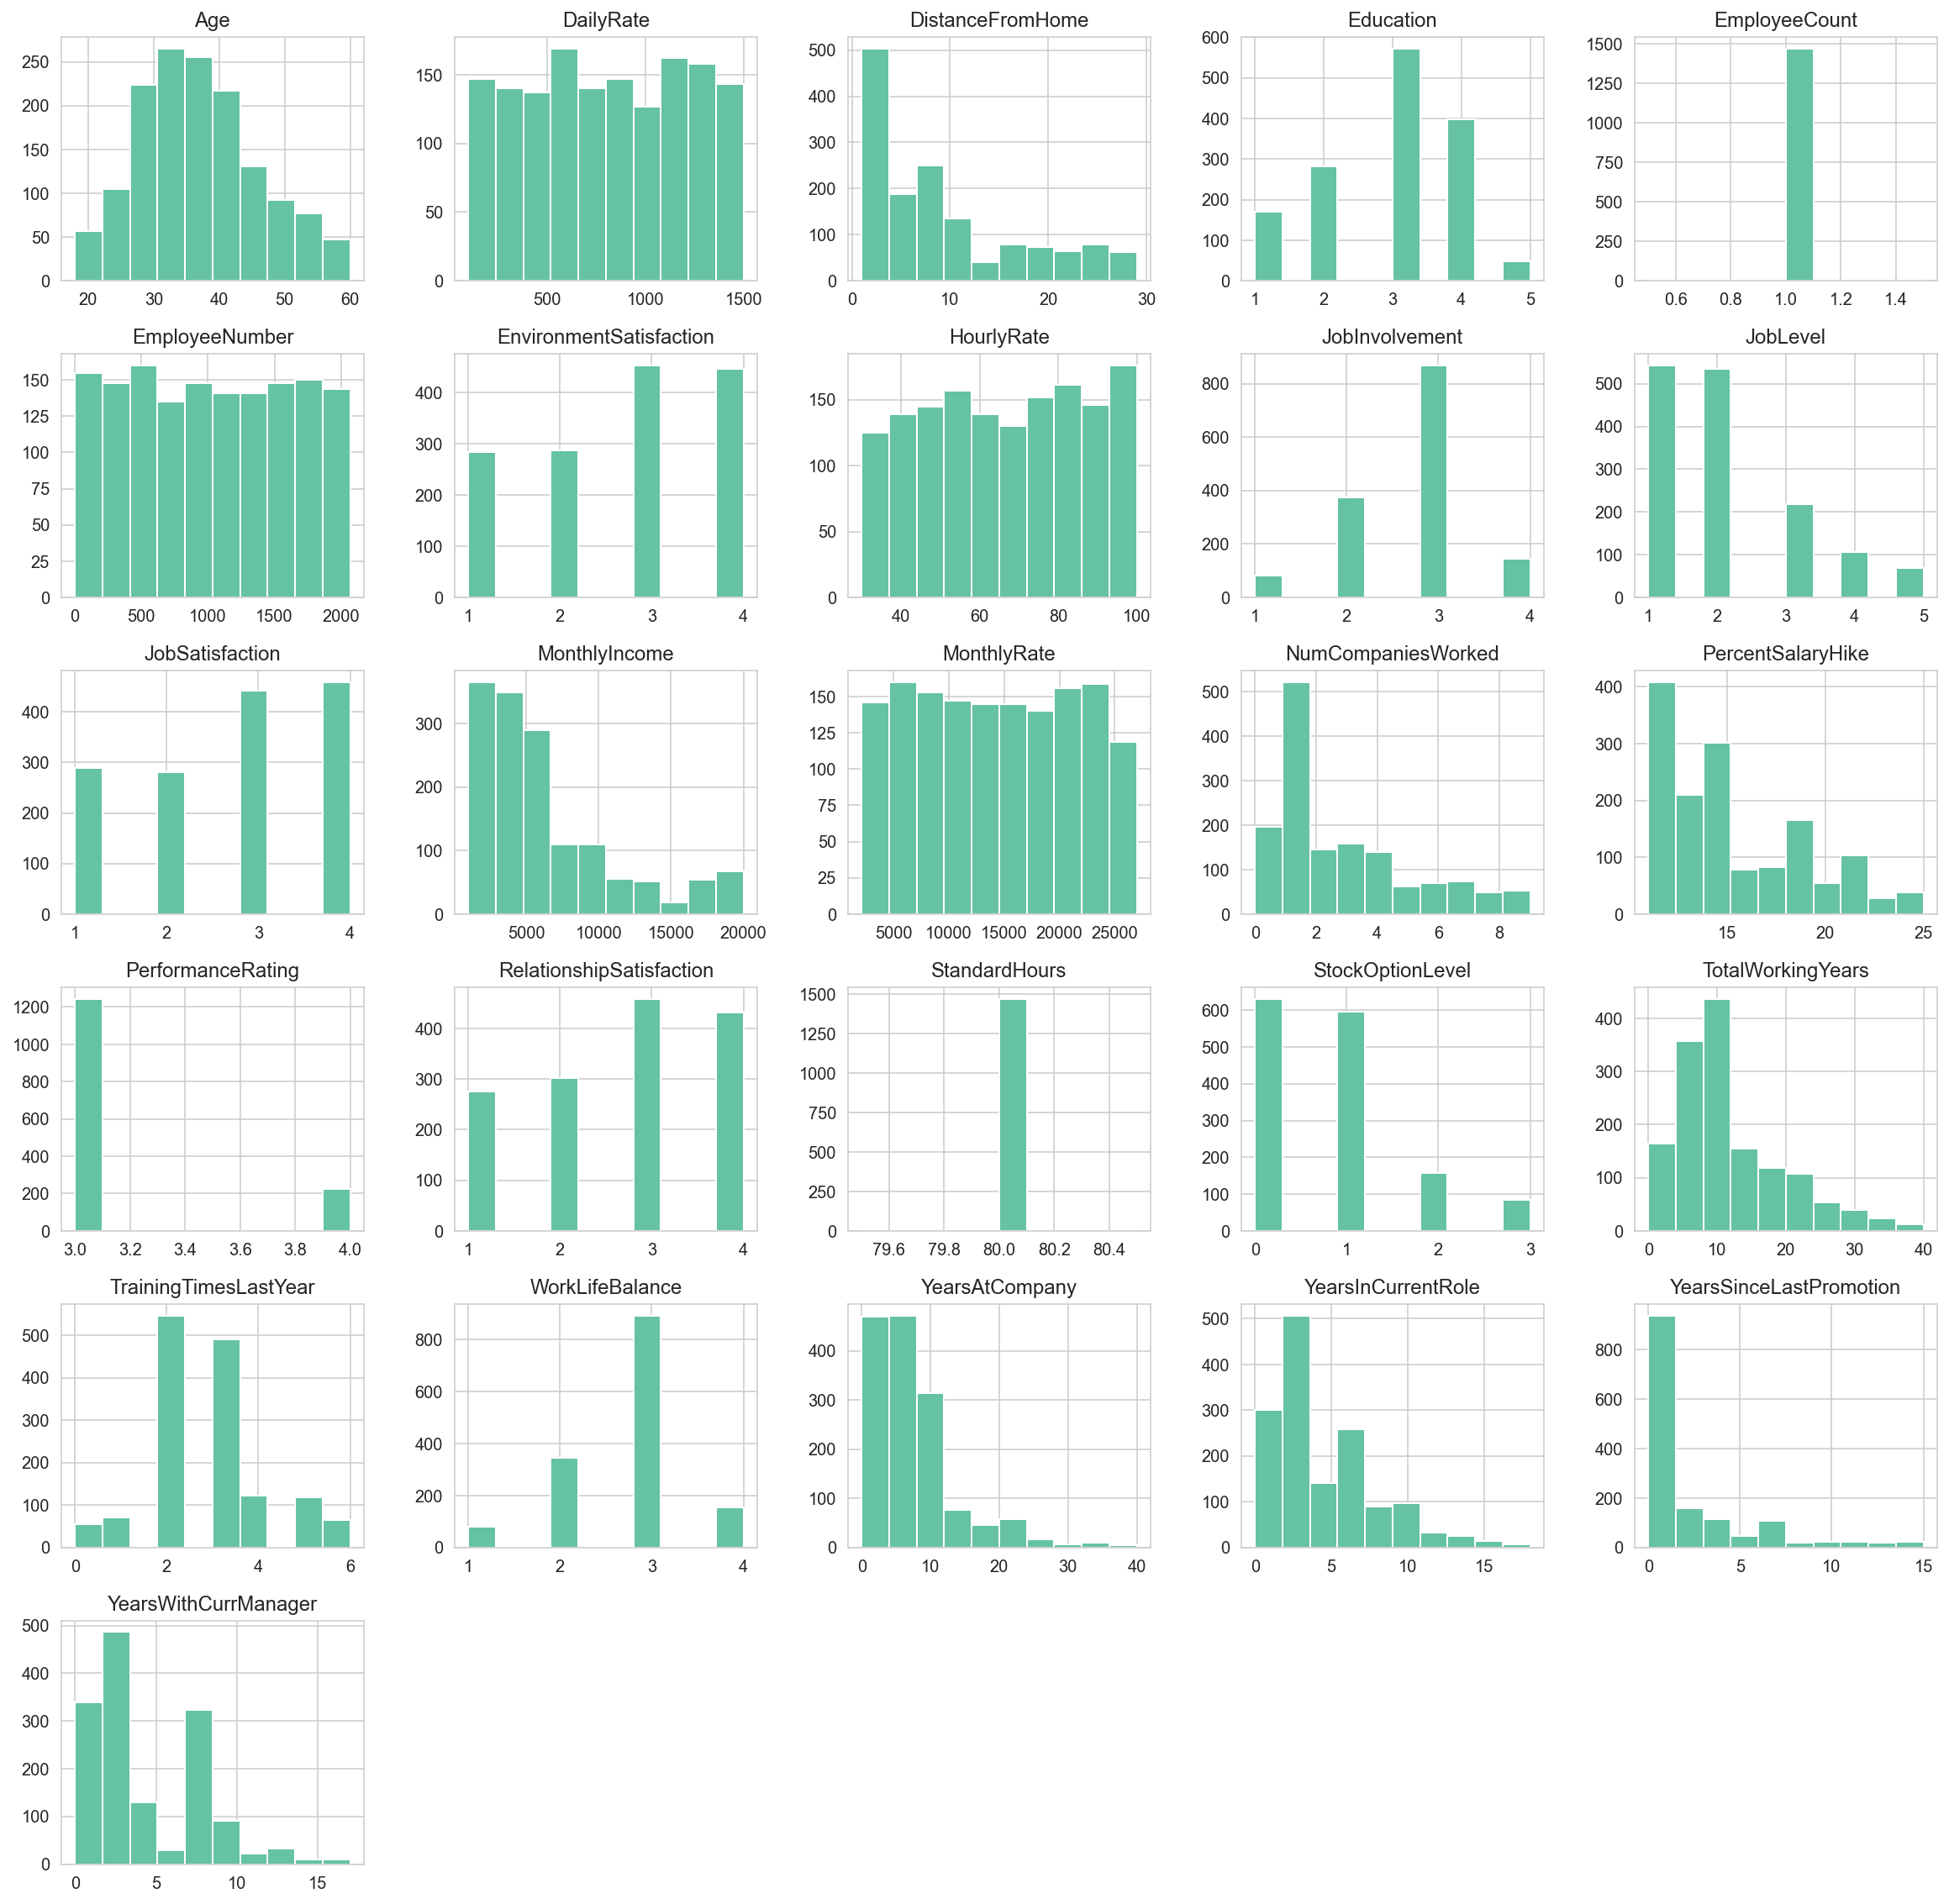

In [211]:
df.hist(figsize=(20,20))
plt.show()

In [212]:
#so by above hist plots, we can observe that years at company,years since last promotion,total working years ,monthly income, distance from home are right-skewed

In [213]:
#we have so many columns here will see now education column , in that so many fiels are there, and individual field will check

In [214]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [215]:

!pip install iplot
import matplotlib.pyplot as plt

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import os
import itertools

sns.set_style('whitegrid')
sns.set_palette("Set2")




In [217]:

df.drop(['EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [218]:
#we can drop these constant columns

In [219]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [220]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [221]:
#dropping this because its constant value and no impact

In [222]:
df_dum = pd.get_dummies(df)

In [223]:
print(df.shape)
print(df_dum.shape)


(1470, 33)
(1470, 55)


In [224]:
#Hey we can clearly see that shape has been changed for dummies because we dropped some columns

In [225]:
df_dum.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRol

In [226]:
df_dum.drop(['Gender_Female','OverTime_No','Attrition_No'],axis=1,inplace=True)

In [227]:
low_col = []
for i in df_dum.columns:
    i = i.lower()
    low_col.append(i)
df_dum.columns = low_col

In [228]:
df_dum.columns

Index(['age', 'dailyrate', 'distancefromhome', 'education',
       'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
       'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'attrition_yes', 'businesstravel_non-travel',
       'businesstravel_travel_frequently', 'businesstravel_travel_rarely',
       'department_human resources', 'department_research & development',
       'department_sales', 'educationfield_human resources',
       'educationfield_life sciences', 'educationfield_marketing',
       'educationfield_medical', 'educationfield_other',
       'educationfield_technical degree', 'gender_male',
       'jobrole_healthcare representative', 'jo

In [229]:
df.Attrition.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [230]:
df.loc[df.Attrition == 'Yes', 'attrition'] = 1
df.loc[df.Attrition == 'No', 'attrition'] = 0

In [231]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

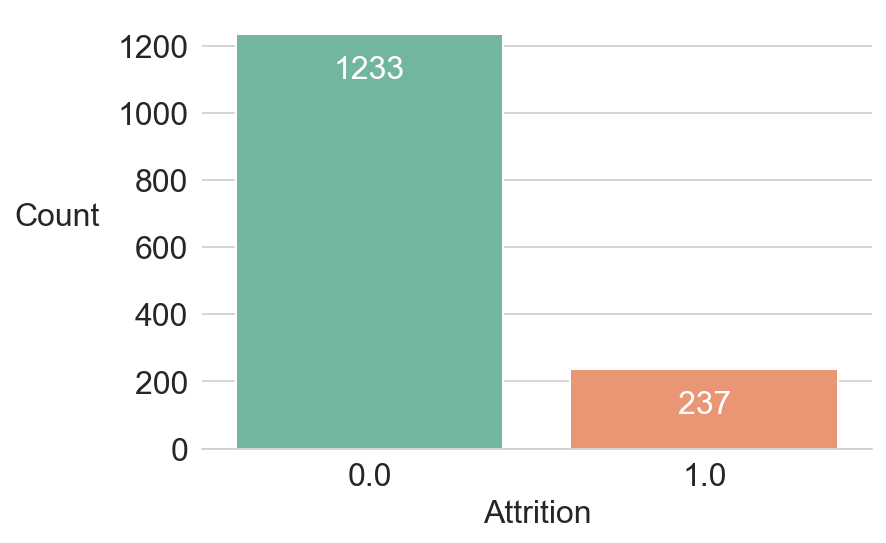

In [232]:
plt.figure(figsize=(6,4))               #plotting target variable
fig = sns.countplot(df.attrition)
sns.despine(left=True)                  #just for setting border
fig.set_xlabel('Attrition', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
for p in fig.patches:                  #to show count values on column
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='white')
plt.show()

In [233]:
print('Percentage breakdown of Attrition')
print('-'*33)
round(df.attrition.value_counts(normalize=True)*100,2)

Percentage breakdown of Attrition
---------------------------------


0.0    83.88
1.0    16.12
Name: attrition, dtype: float64

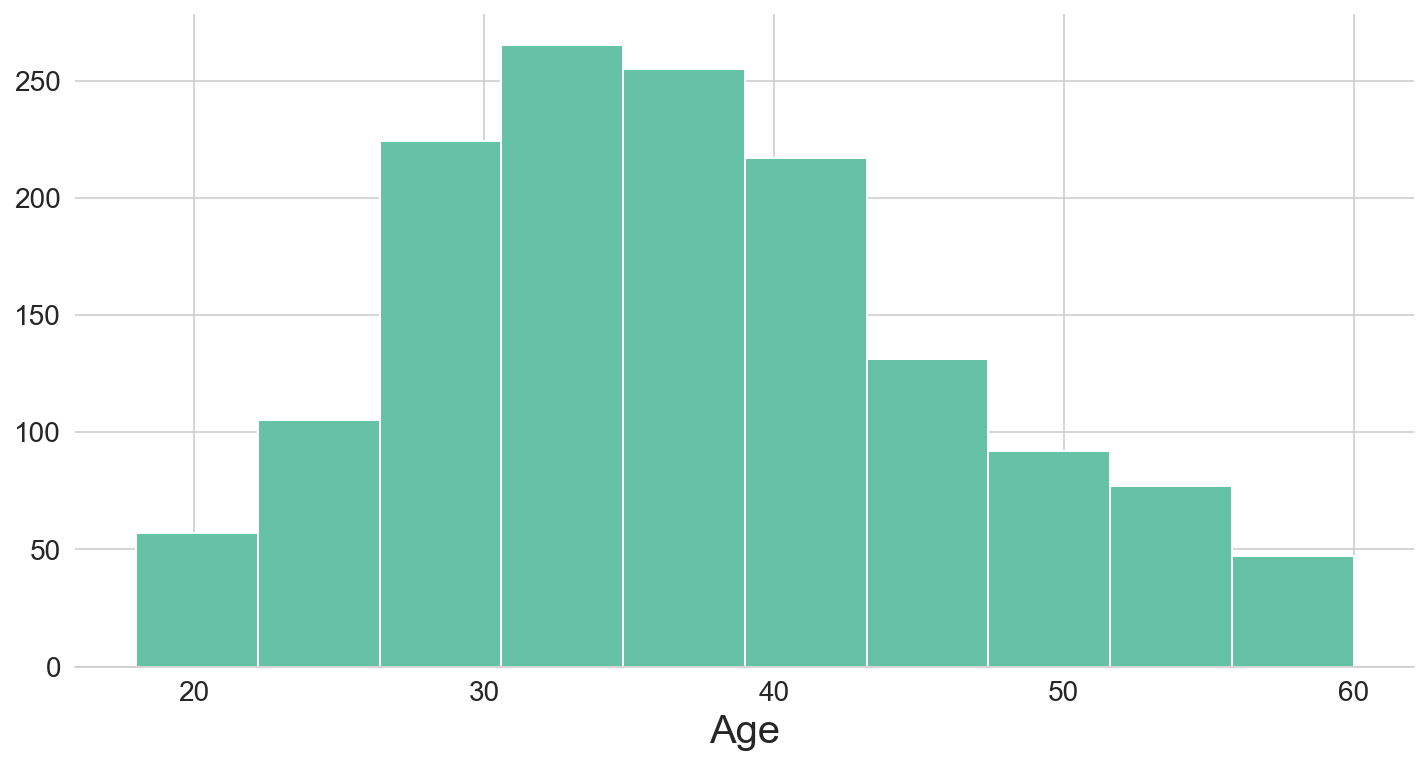

In [234]:
#plotting for Age
plt.figure(figsize=(12,6))
fig = sns.distplot(df.Age,kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
fig.set_xlabel('Age',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.show()

In [235]:
#its showing some positive skewness

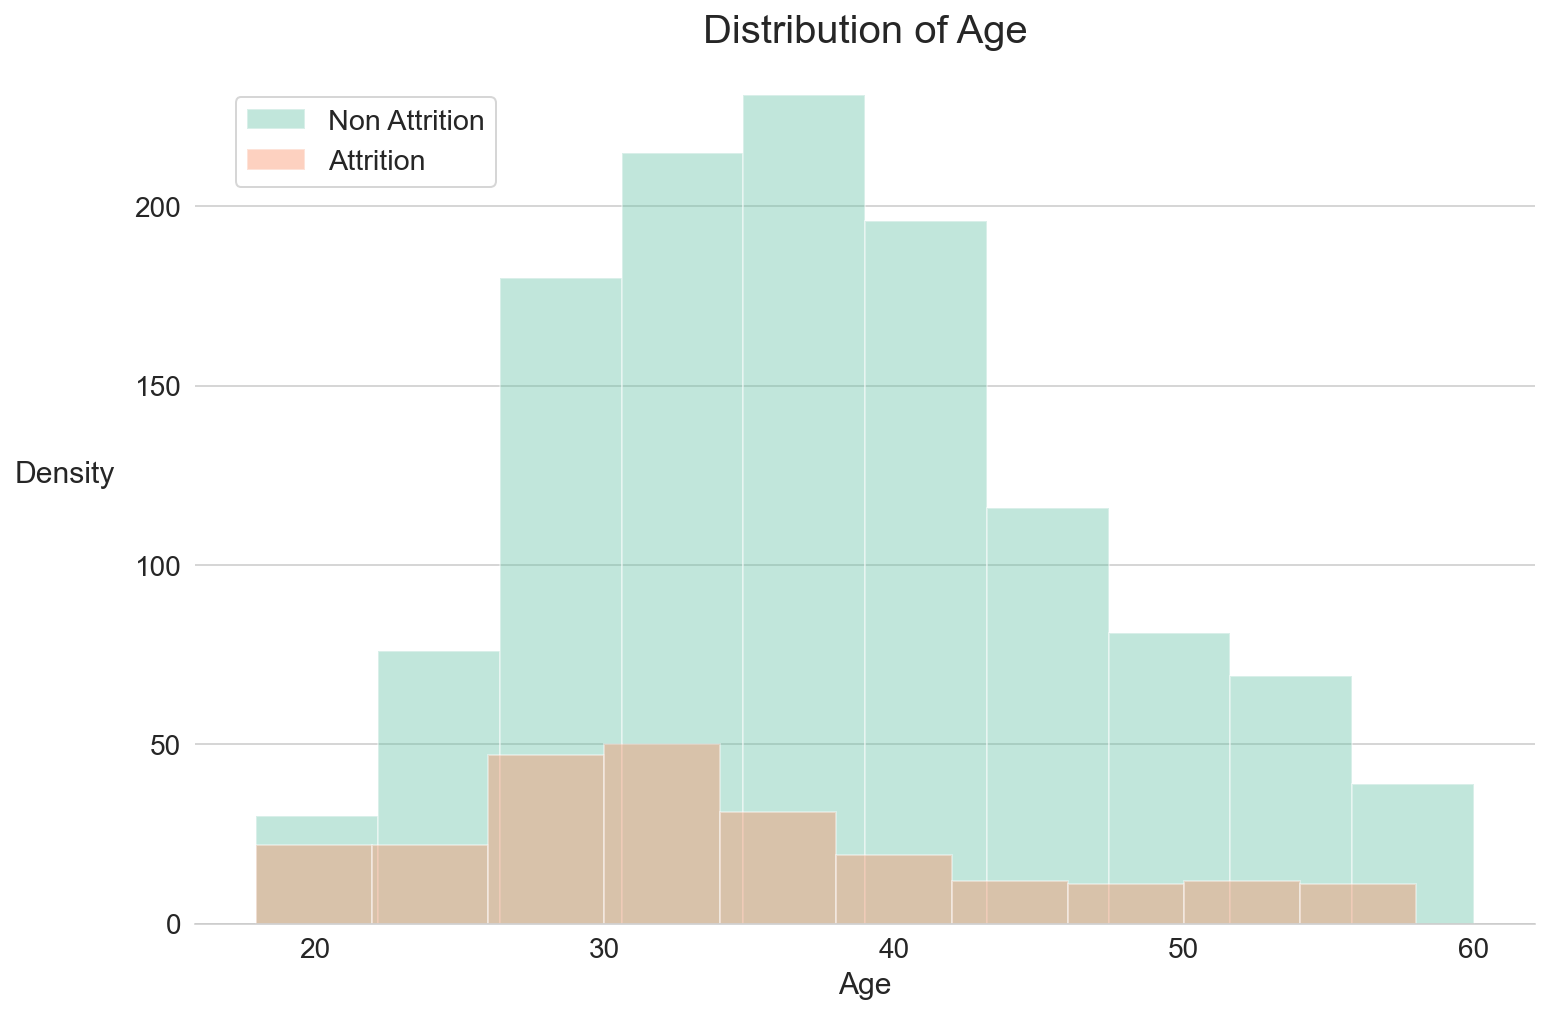

In [236]:

#we will be seeing further more relation between age and attrition
plt.figure(figsize=(12,8))
fig = sns.distplot(df[df['attrition'] == 0]['Age'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['Age'], label='Attrition', kde=0, bins=10)

sns.despine(left=1)
fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Age',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
""" Control the size and positioning of the legend. """
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

In [237]:
#from above graph we can see attrition is same for all age groups escipically in twenties, lowest in 40's and some what increase in retirement

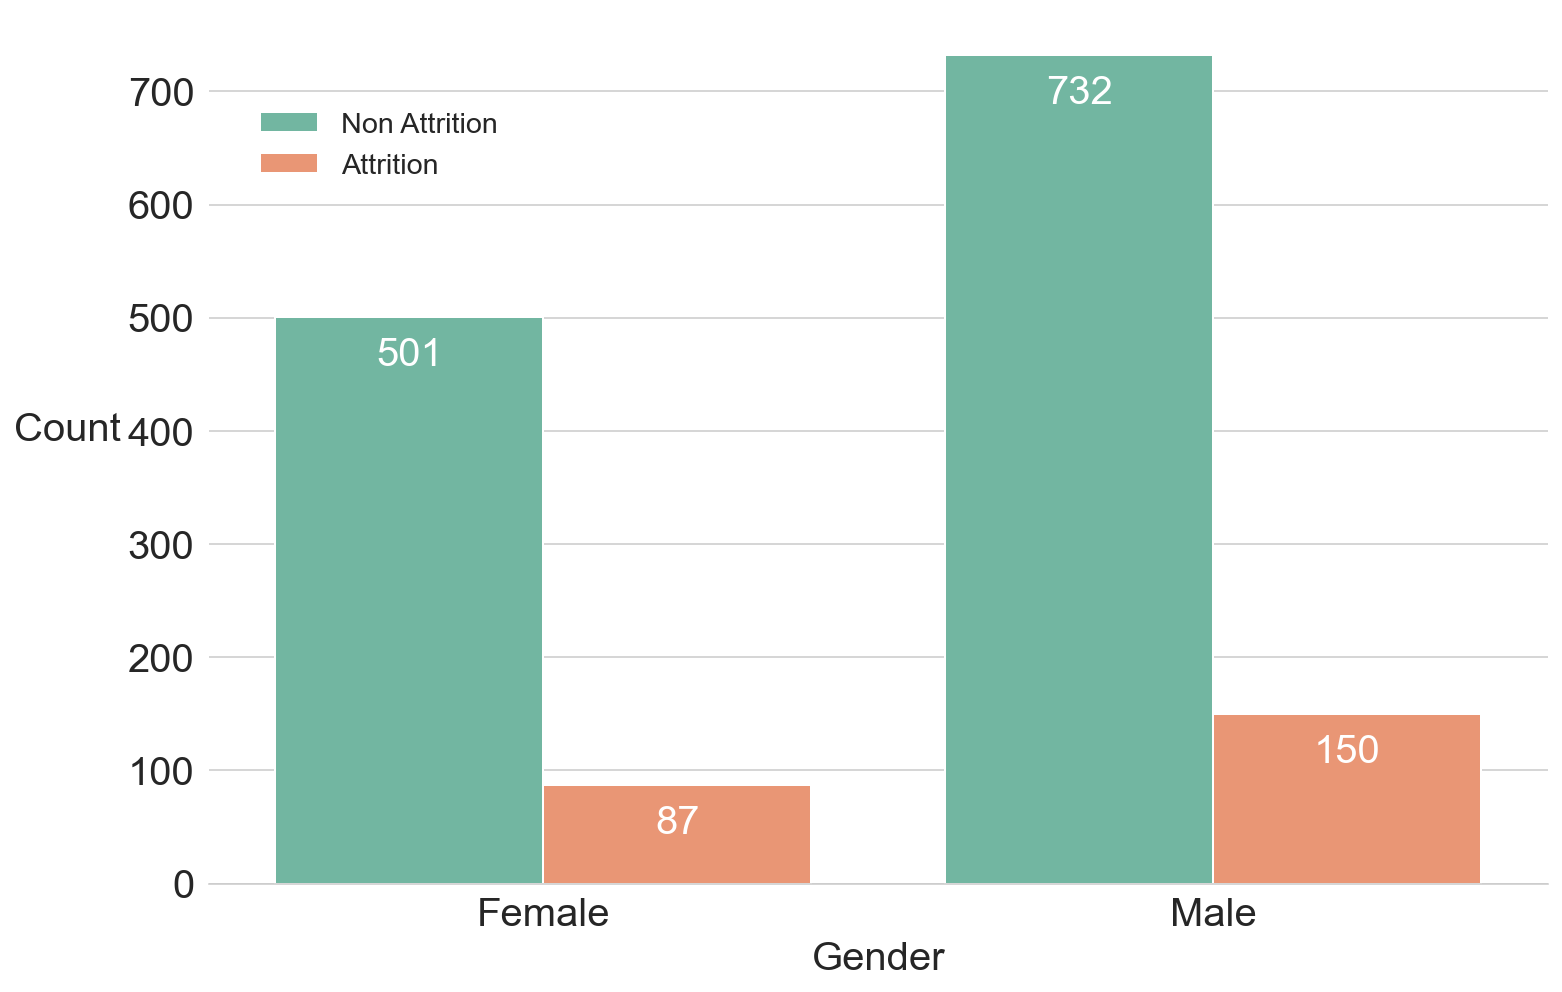

Female Attrition percentage & count
-----------------------------------
0.0    85.2
1.0    14.8
Name: attrition, dtype: float64
0.0    501
1.0     87
Name: attrition, dtype: int64
___________________________________

Male Attrition percentage & count
-----------------------------------
0.0    82.99
1.0    17.01
Name: attrition, dtype: float64
0.0    732
1.0    150
Name: attrition, dtype: int64
___________________________________


In [238]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='Gender', hue='attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

print('Female Attrition percentage & count')
print('-'*35)
print(round(df[df.Gender == 'Female'].attrition.value_counts(normalize=True)*100,2))
print(df[df.Gender == 'Female'].attrition.value_counts())
print('_'*35)
print(''*35)
print('Male Attrition percentage & count')
print('-'*35)
print(round(df[df.Gender == 'Male'].attrition.value_counts(normalize=True)*100,2))
print(df[df.Gender == 'Male'].attrition.value_counts())
print('_'*35)

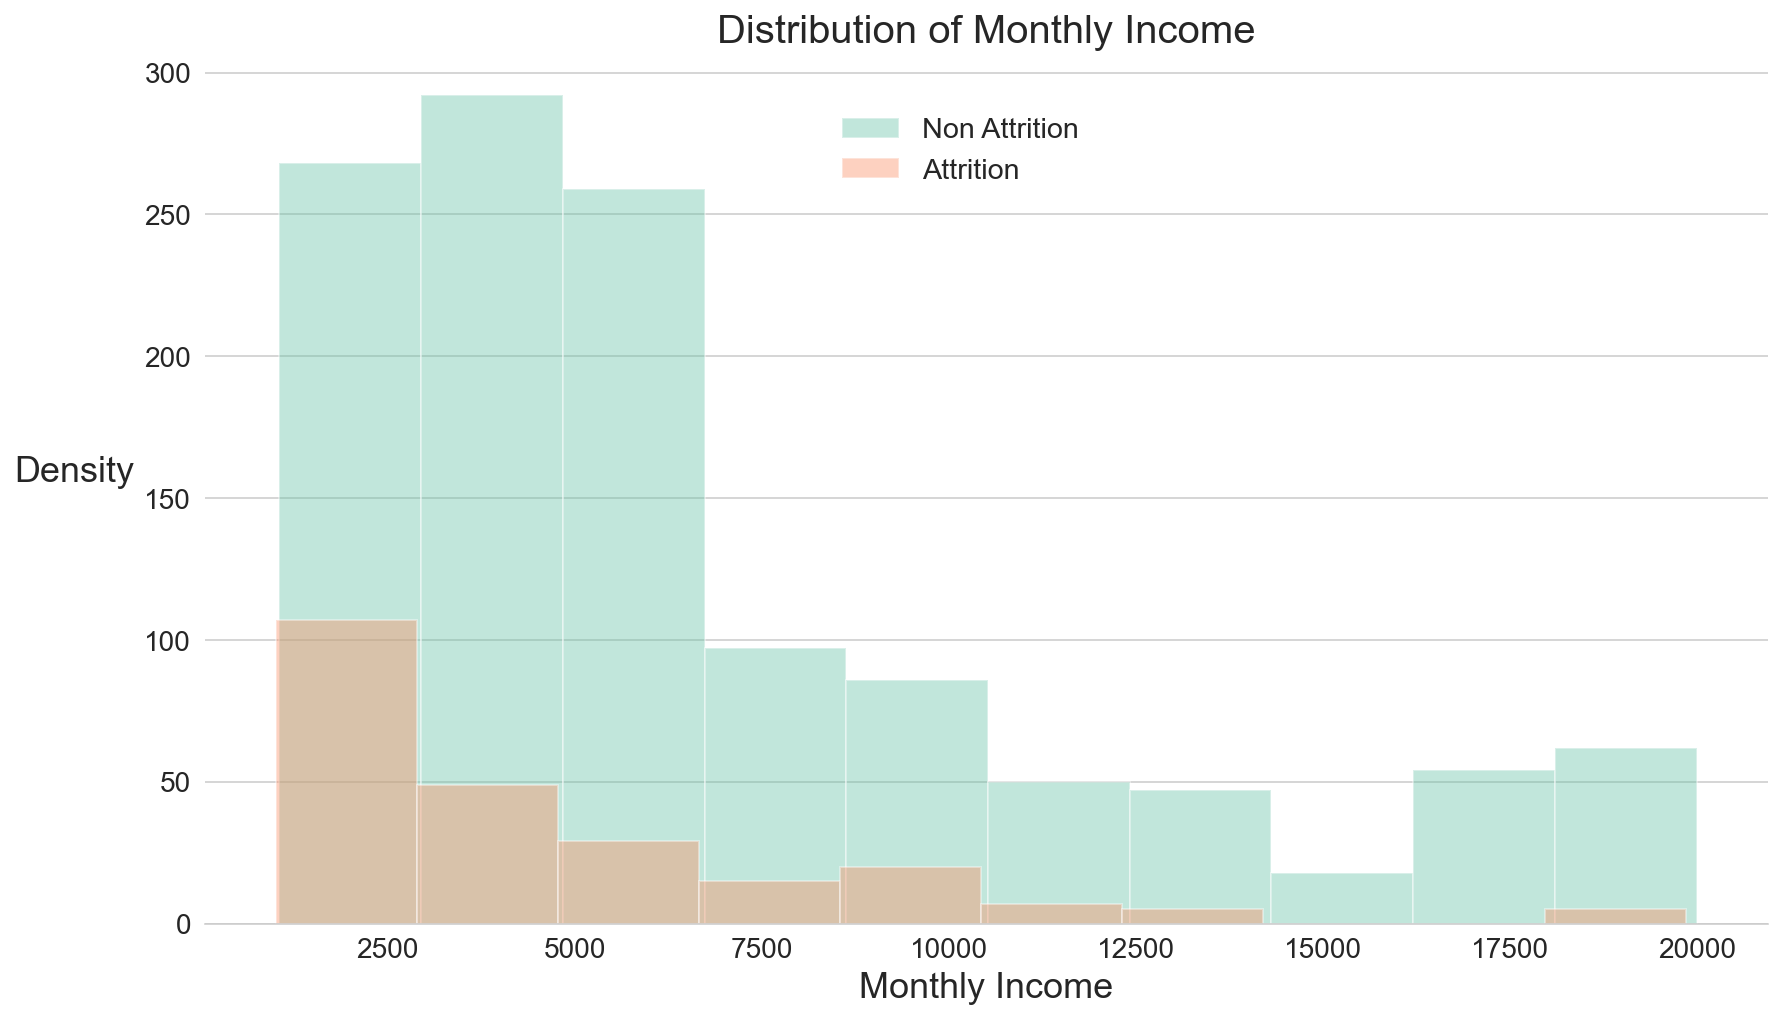

Average Monthly Income: 6502.931292517007
Average Monthly Income for Males: 6380.507936507936
Average Monthly Income for Females: 6686.566326530612


In [239]:

plt.figure(figsize=(14,8))
fig = sns.distplot(df[df['attrition'] == 0]['MonthlyIncome'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['MonthlyIncome'], label='Attrition', kde=0, bins=10)
sns.despine(left=1)
fig.grid(axis='x')
plt.xlabel('Monthly Income',fontsize=18)
plt.ylabel('Density',fontsize=18, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Monthly Income',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:',df.MonthlyIncome.mean())
print('Average Monthly Income for Males:',df[df.Gender == 'Male']['MonthlyIncome'].mean())
print('Average Monthly Income for Females:',df[df.Gender == 'Female']['MonthlyIncome'].mean())

In [240]:
income = df.groupby(by='JobRole').mean().MonthlyIncome
inc = pd.DataFrame(income)
inc = inc.sort_values(by='MonthlyIncome')

In [241]:
job_atr = df[df['attrition'] == 1]['JobRole']
job_atr_val = job_atr.value_counts()
job_atr_df = pd.DataFrame(job_atr_val)

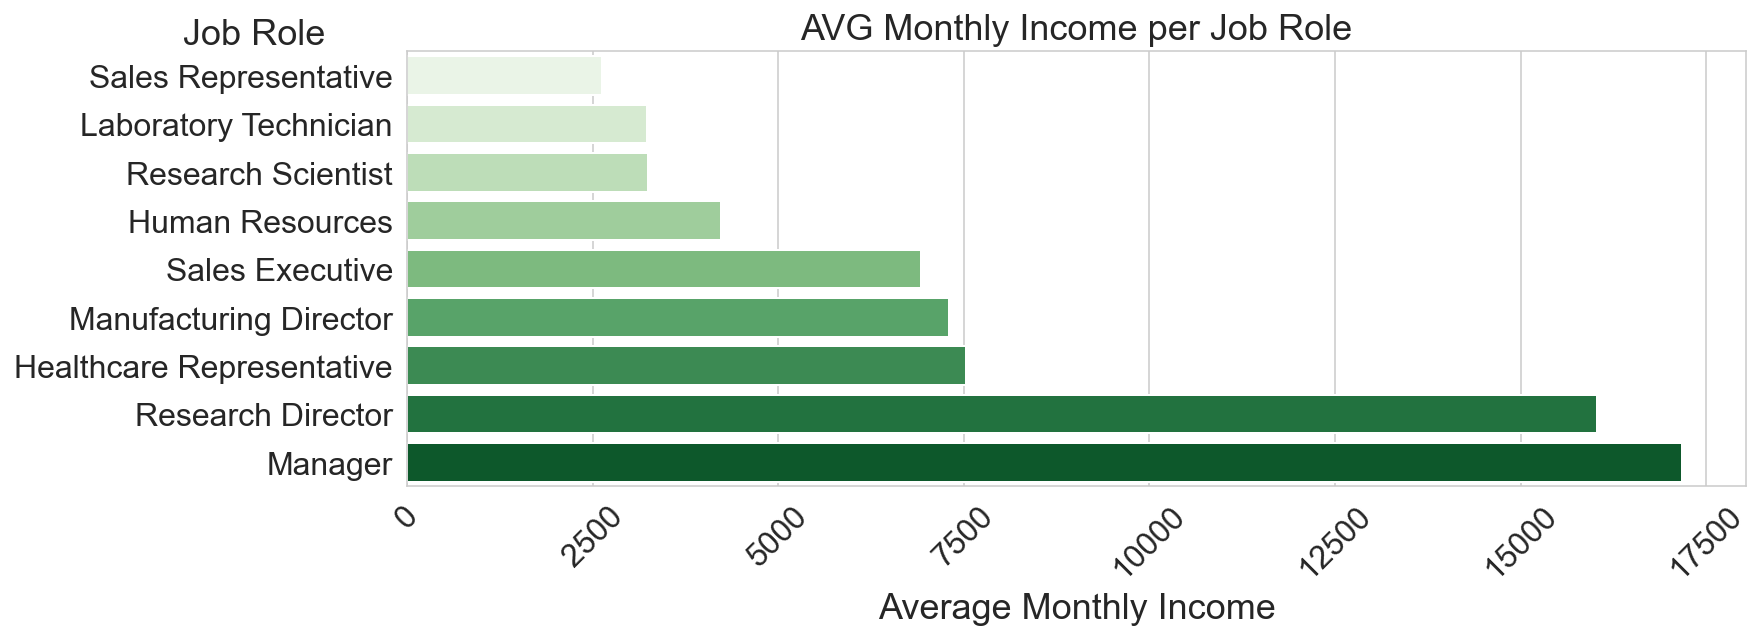

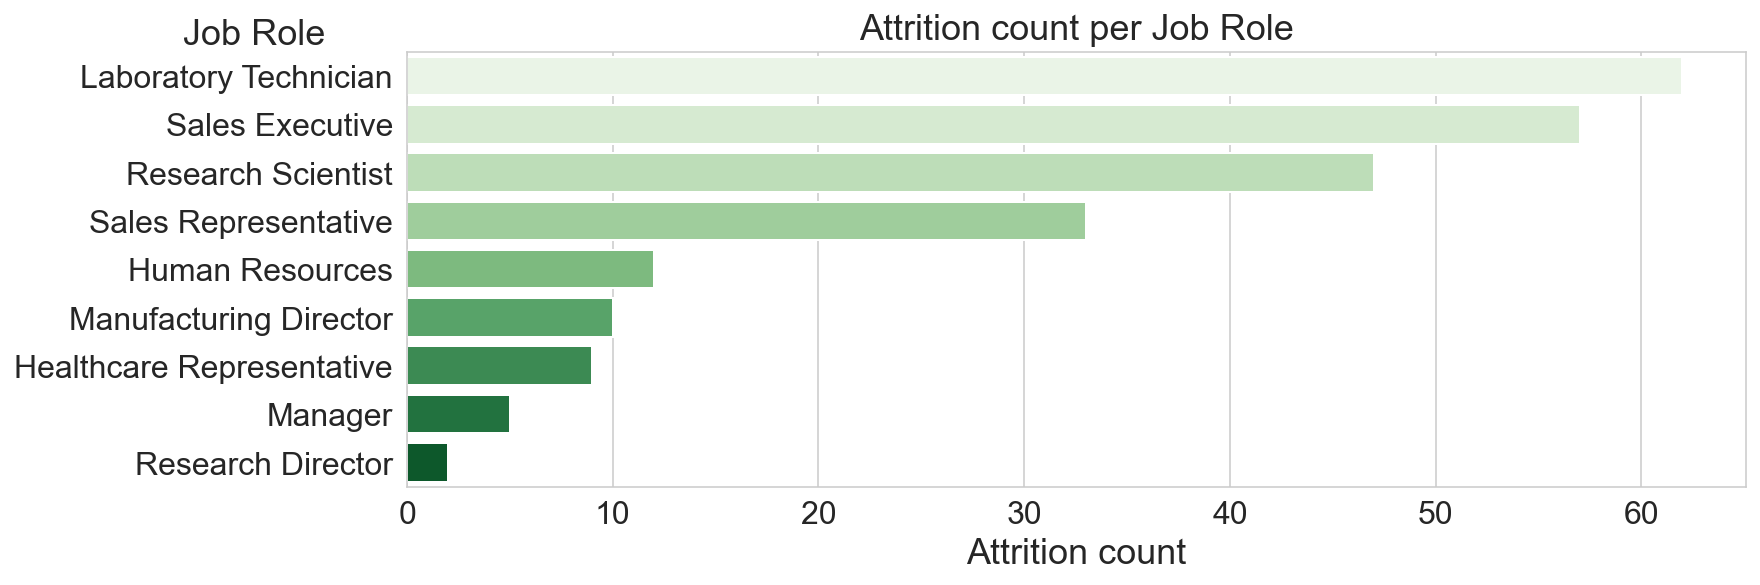

In [242]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=inc.index, x='MonthlyIncome', data=inc,
                  palette=sns.color_palette("Greens", n_colors=len(inc.index)))
fig.set_title('AVG Monthly Income per Job Role',fontsize=18)
fig.set_xlabel('Average Monthly Income', fontsize=18)
fig.set_ylabel('Job Role', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -120
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

plt.figure(figsize=(12,4))
fig = sns.barplot(y=job_atr_df.index, x='JobRole', data=job_atr_df, 
                  palette=sns.color_palette("Greens", n_colors=len(job_atr_df.index)))
fig.set_title('Attrition count per Job Role',fontsize=18)
fig.set_xlabel('Attrition count', fontsize=18)
fig.set_ylabel('Job Role', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -120
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()



In [243]:
#in above graphs will show relation between average monthly income per job role and attrition count attrition count as per job role.
#lab technician and sales executive goes with high average income

In [244]:
edu_sal = df.groupby('Education').mean().MonthlyIncome
edu_sal_df=pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('MonthlyIncome', ascending=False)


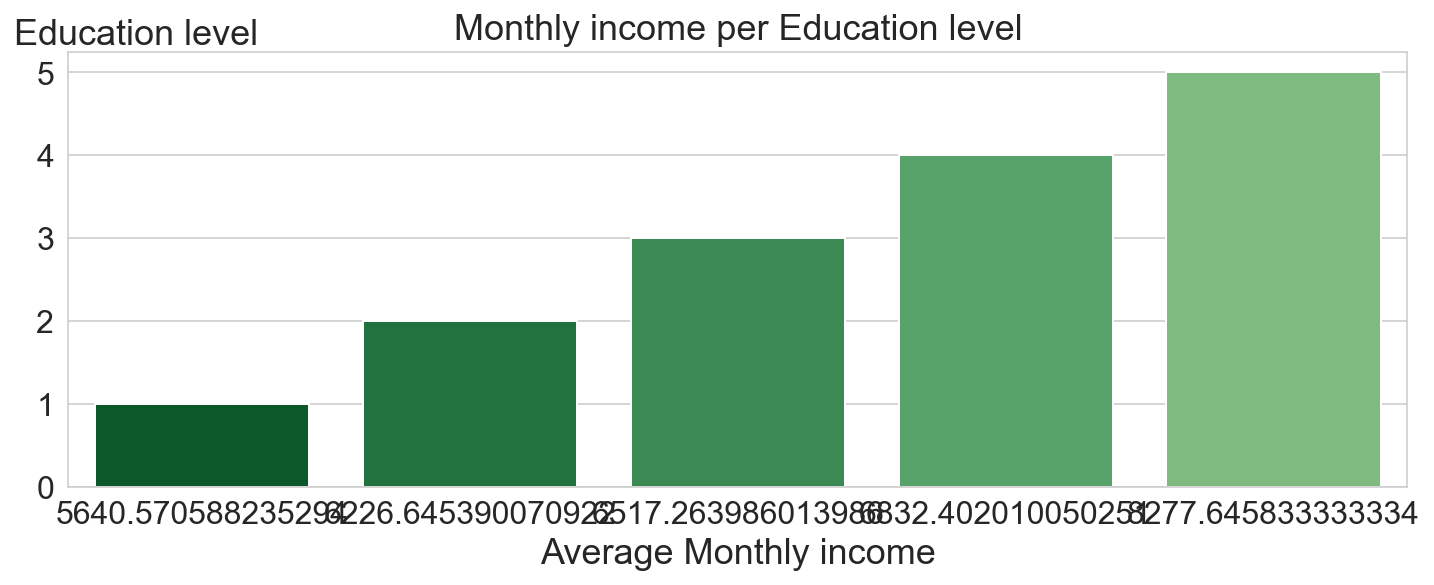

In [245]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=edu_sal_df.index, x='MonthlyIncome', data=edu_sal_df,palette=sns.color_palette("Greens_r", n_colors=len(job_atr_df.index)))
fig.set_title('Monthly income per Education level',fontsize=18)
fig.set_xlabel('Average Monthly income', fontsize=18)
fig.set_ylabel('Education level', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -50
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()

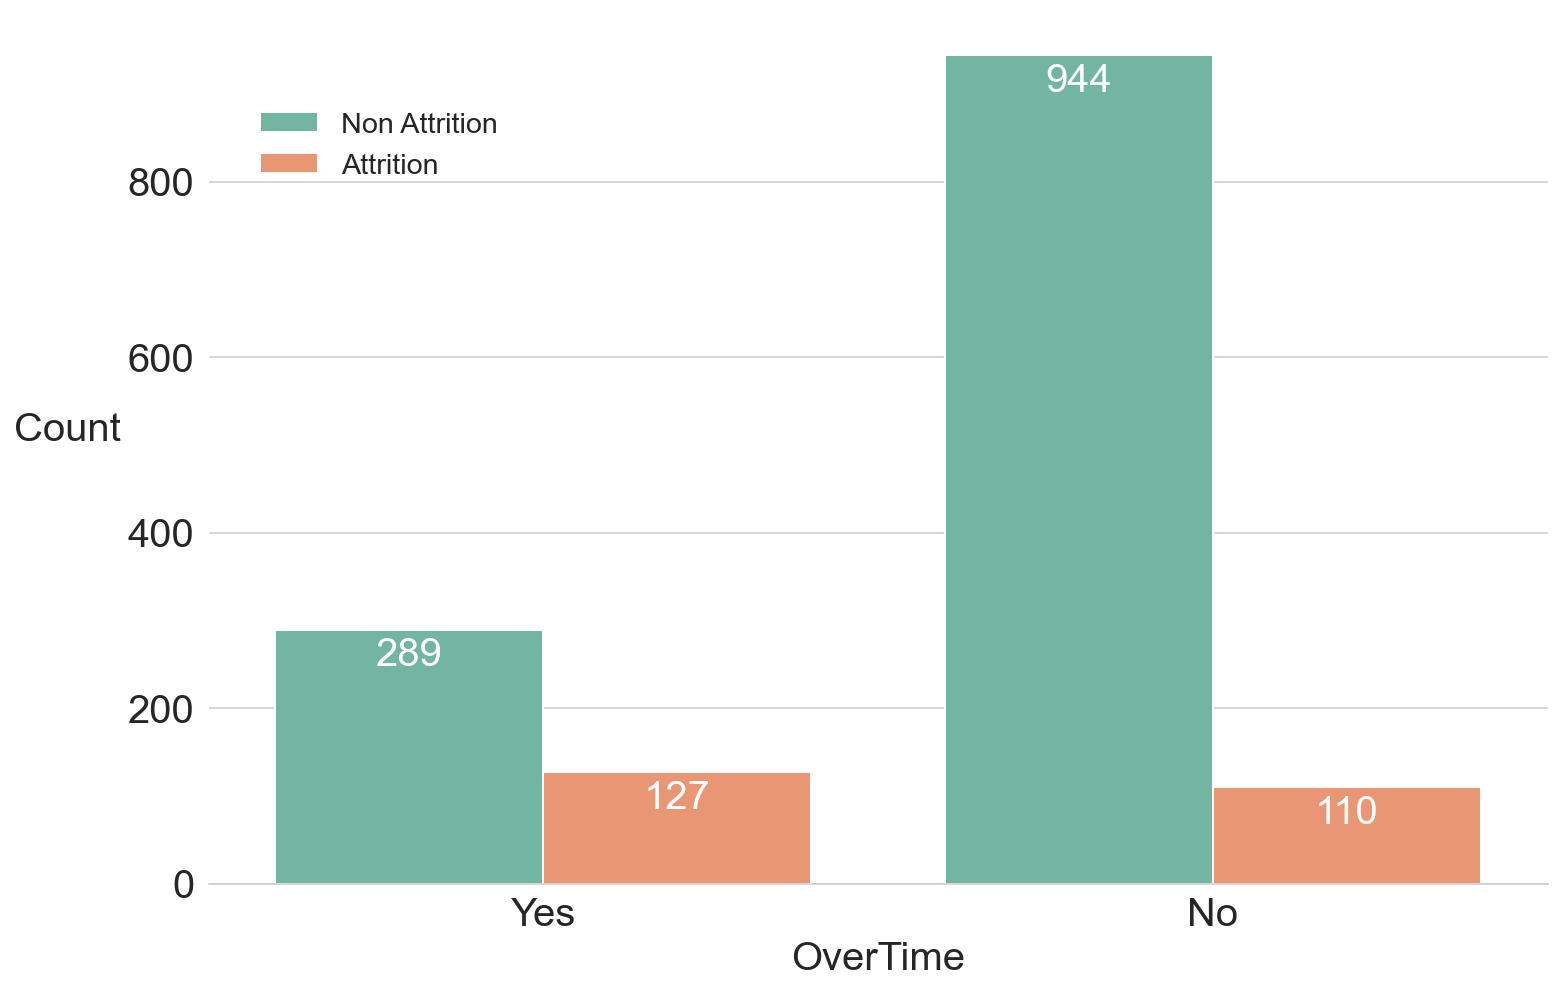

In [246]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='OverTime', hue='attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('OverTime', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

In [247]:
#so by all these attrition depends on age, monthly income and overtime

In [248]:
df=df_dum
df = df.astype(float)

df.shape

(1470, 52)

In [249]:
df.rename({'attrition_yes':'attrition'}, axis=1, inplace=True)

In [250]:
df.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,businesstravel_non-travel,businesstravel_travel_frequently,businesstravel_travel_rarely,department_human resources,department_research & development,department_sales,educationfield_human resources,educationfield_life sciences,educationfield_marketing,educationfield_medical,educationfield_other,educationfield_technical degree,gender_male,jobrole_healthcare representative,jobrole_human resources,jobrole_laboratory technician,jobrole_manager,jobrole_manufacturing director,jobrole_research director,jobrole_research scientist,jobrole_sales executive,jobrole_sales representative,maritalstatus_divorced,maritalstatus_married,maritalstatus_single,over18_y,overtime_yes
0,41.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,49.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37.0,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,27.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [251]:
# Seperate dataframe into the target and features
X = df.drop('attrition', axis=1)
y = df.attrition

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 51)
(294, 51)
(1176,)
(294,)


In [253]:
y.value_counts(normalize=True)

0.0    0.838776
1.0    0.161224
Name: attrition, dtype: float64

In [254]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

LogisticRegression
****Results****
Accuracy: 85.7143%
Log Loss: 0.38479412431457344
KNeighborsClassifier
****Results****
Accuracy: 79.5918%
Log Loss: 2.716224716528208
SVC
****Results****
Accuracy: 85.3741%
Log Loss: 0.43713109495776026
DecisionTreeClassifier
****Results****
Accuracy: 79.2517%
Log Loss: 7.166208707787591
RandomForestClassifier
****Results****
Accuracy: 88.4354%
Log Loss: 0.3440445726399317
GradientBoostingClassifier
****Results****
Accuracy: 88.7755%
Log Loss: 0.3122873926405357
GaussianNB
****Results****
Accuracy: 75.5102%
Log Loss: 0.6041422914809841


In [255]:
log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')

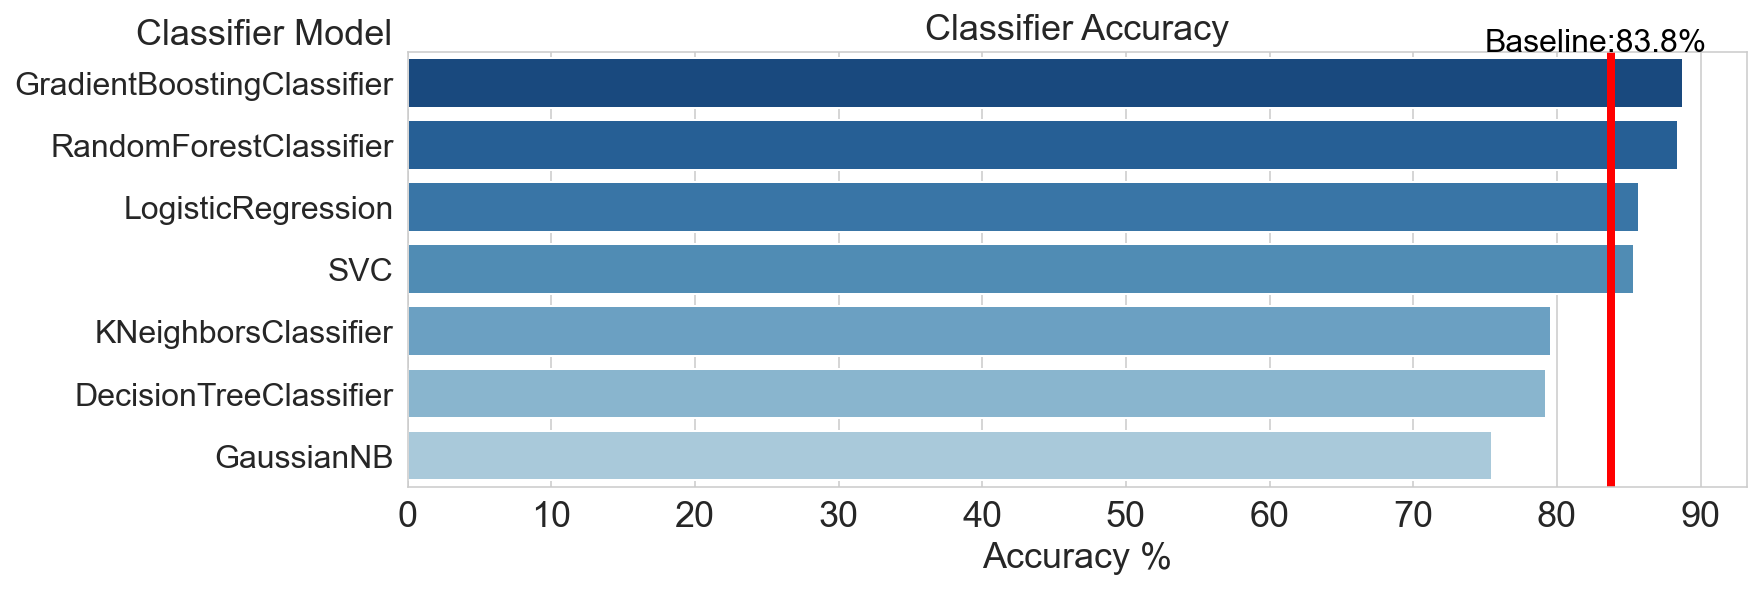

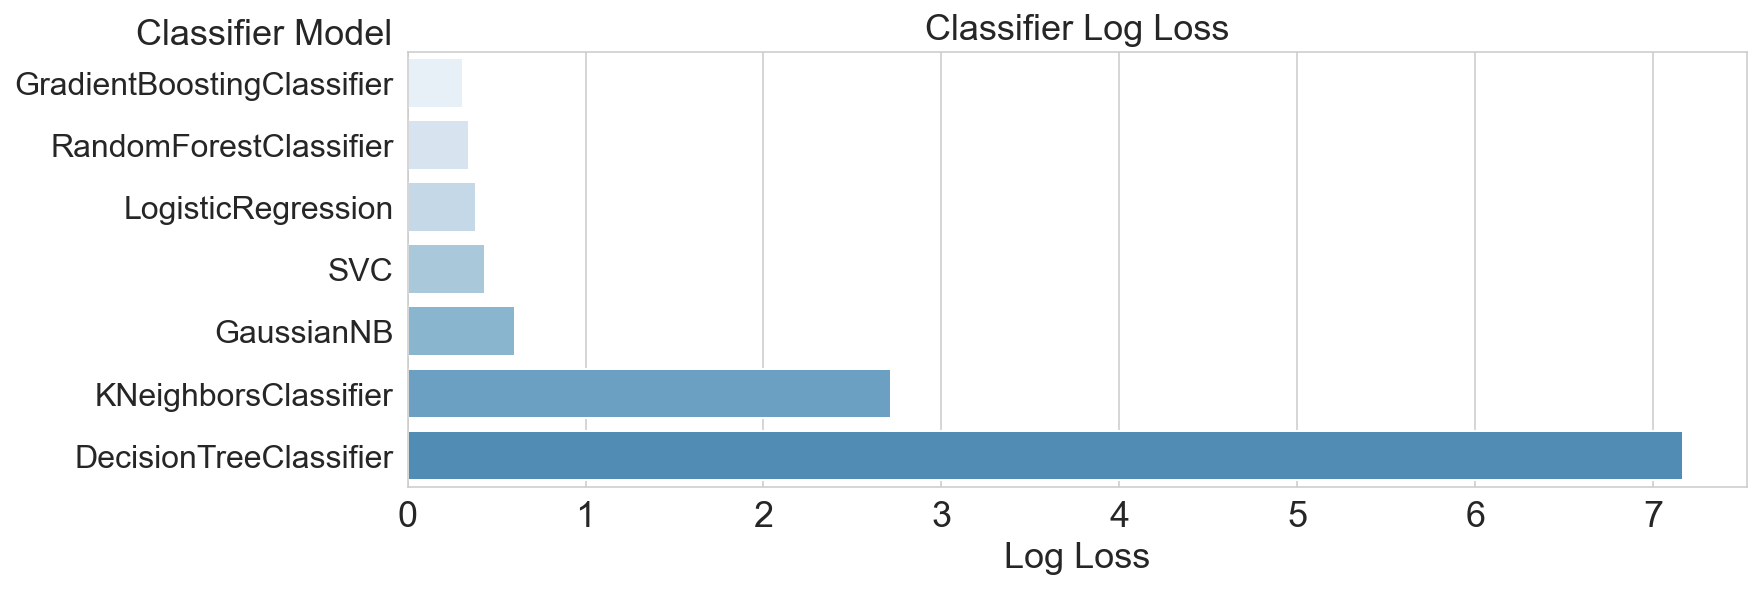

In [259]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(s='Baseline:83.8%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()

In [260]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1','l2'] }

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LogisticRegression(), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l1', tol=0.0001),
             param_grid=param_grid)       #creating paragrid 

GridSearchCV(estimator=LogisticRegression(penalty='l1'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [262]:
clf.fit(X_train, y_train)
clf.param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

In [263]:
results = pd.DataFrame(clf.cv_results_)
final = results[['param_C','param_penalty','mean_test_score']].sort_values('mean_test_score')
final              #creating new dataframe

,param_C,param_penalty,mean_test_score
1,0.001,l2,0.835034
3,0.01,l2,0.835885
11,100,l2,0.835885
9,10,l2,0.837587
7,1,l2,0.837591
13,1000,l2,0.838439
5,0.1,l2,0.840992
0,0.001,l1,NaN
2,0.01,l1,NaN
4,0.1,l1,NaN


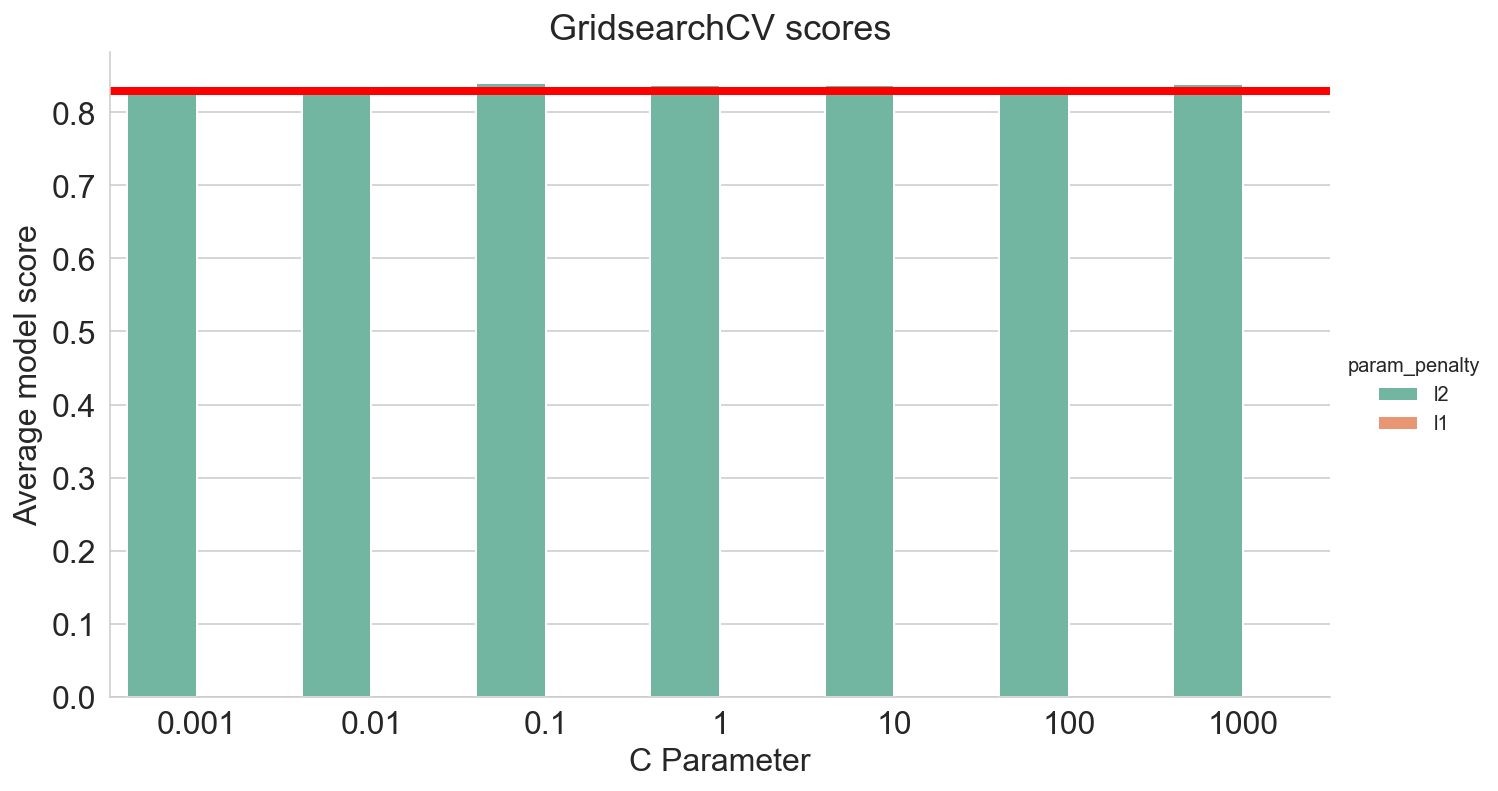

In [264]:
sns.catplot(y='mean_test_score', x='param_C', hue='param_penalty', data=final, kind='bar', aspect=15/8.27)
plt.axhline(0.83, 0,1, lw=4, color='red')
plt.title('GridsearchCV scores',fontsize=18)
plt.xlabel('C Parameter', fontsize=16)
plt.ylabel('Average model score', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [266]:
print(clf.best_params_)
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
0.8409917057338623
Accuracy of the best classifier after CV is 85.37%


In [ ]:
#conclusion
#So finally i got accuracy score of 85.37%